In [1]:
library('dplyr')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# load baseline datafiles
doe.baseline <- read.csv("./baseline_large_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.baseline <- read.csv("./baseline/baseline threat run large NOLH experiment-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.baseline)[1] <- "experiment.number"

# build the dataset
data.baseline <- merge(doe.baseline, results.baseline, "experiment.number")

# scale to real world size
data.baseline$marker.mean <- data.baseline$marker.mean * 5
data.baseline$marker.std.dev <- data.baseline$marker.std.dev * 5

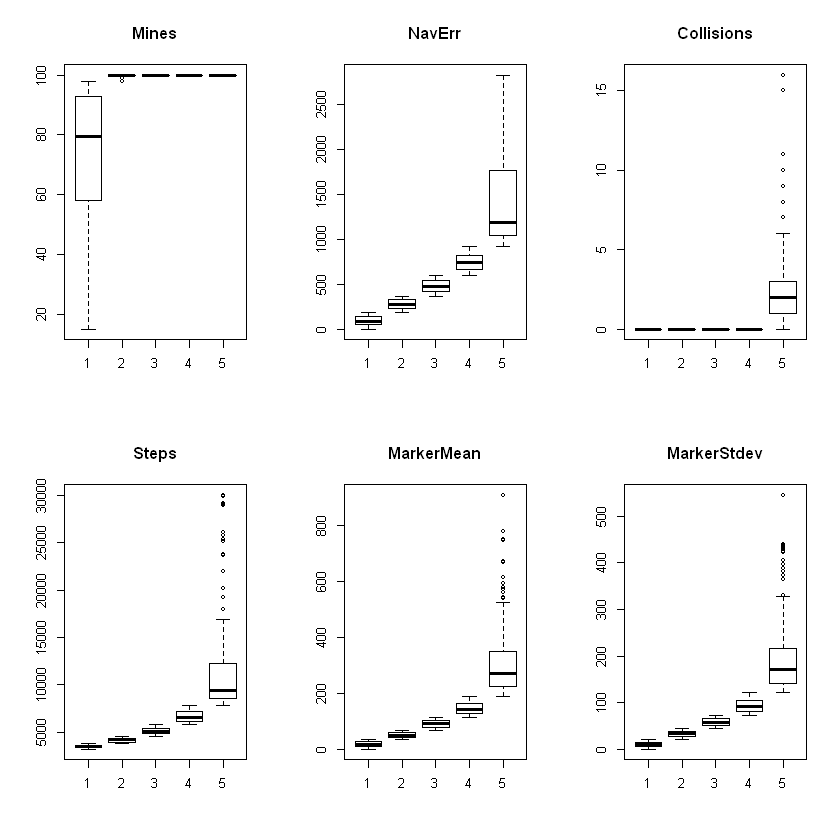

In [3]:
# split the run results into quintiles by measure of performance
data.baseline %>% mutate(
    mine.quintile = ntile(data.baseline$count.mine.contacts, 5),
    step.quintile = ntile(data.baseline$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.baseline.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')

In [4]:
baseline.marker.mean.formula <- marker.mean ~ uuv.speed*nav.bearing.std*side_hi_range+current.heading
baseline.marker.mean.model <- lm(baseline.marker.mean.formula, data=data.baseline)
summary(baseline.marker.mean.model)
summary(lm(marker.mean ~ . , data=data.baseline))


Call:
lm(formula = baseline.marker.mean.formula, data = data.baseline)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.00  -46.03   -8.15   27.06  746.21 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                               417.7551   244.6777   1.707  0.08800
uuv.speed                                -191.4261   117.4139  -1.630  0.10327
nav.bearing.std                         -1723.8078   849.5429  -2.029  0.04265
side_hi_range                              -0.5995     0.3434  -1.746  0.08112
current.heading                             0.1432     0.0234   6.118 1.26e-09
uuv.speed:nav.bearing.std                1169.3290   407.8713   2.867  0.00421
uuv.speed:side_hi_range                     0.2612     0.1663   1.571  0.11638
nav.bearing.std:side_hi_range               3.5555     1.1979   2.968  0.00305
uuv.speed:nav.bearing.std:side_hi_range    -1.8893     0.5806  -3.254  0.00117
                             


Call:
lm(formula = marker.mean ~ ., data = data.baseline)

Residuals:
     Min       1Q   Median       3Q      Max 
-263.935  -21.973   -3.082   17.348  301.601 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.269e+02  2.823e+01   8.037 2.09e-15 ***
experiment.number             -2.881e-02  3.773e-02  -0.764 0.445239    
source.level                  -5.843e-01  1.126e-01  -5.188 2.47e-07 ***
classification.threshold.std   8.046e-01  5.161e-01   1.559 0.119213    
classification.threshold.mean -4.714e-01  4.674e-01  -1.009 0.313369    
sonar_ping_rate                4.653e-01  3.314e-01   1.404 0.160621    
uuv.speed                     -1.239e+01  2.676e+00  -4.632 4.00e-06 ***
turn.radius                    7.152e-01  4.639e-01   1.542 0.123432    
side_angle                     2.248e-02  1.865e-01   0.121 0.904079    
side_hi_range                 -3.242e-02  2.322e-02  -1.396 0.162891    
forward_angle      

In [11]:
# load baseline datafiles
doe.bubble <- read.csv("./bubble_field_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.bubble.cgrid <- read.csv("./bubble_field/baseline bubble field 5x5-table.csv", skip=6, header=TRUE)
results.bubble.ogrid <- read.csv("./bubble_field/baseline bubble field 5x5 open-table.csv", skip=6, header=TRUE)
results.bubble.horiz <- read.csv("./bubble_field/baseline bubble field 5 horizontal-table.csv", skip=6, header=TRUE)
results.bubble.vert <- read.csv("./bubble_field/baseline bubble field 5 vertical-table.csv", skip=6, header=TRUE)

results.bubble.cgrid$grid = as.factor("closed")
results.bubble.ogrid$grid = as.factor("open")
results.bubble.horiz$grid = as.factor("horizontal")
results.bubble.vert$grid = as.factor("vertical")

results.bubble <- rbind(results.bubble.cgrid, results.bubble.ogrid, results.bubble.horiz, results.bubble.vert)

In [12]:
# format column names
colnames(doe.bubble)[1] <- "experiment.number"

# build the dataset
data.bubble <- merge(doe.bubble, results.bubble, "experiment.number")

# scale to real world size
data.bubble$marker.mean <- data.bubble$marker.mean * 5
data.bubble$marker.std.dev <- data.bubble$marker.std.dev * 5

In [13]:
head(data.bubble)

experiment.number,source.level,classification.threshold.std,classification.threshold.mean,sonar_ping_rate,uuv.speed,turn.radius,side_angle,side_hi_range,forward_angle,...,field.attenuation,X.run.number.,random.seed,X.step.,number.of.collisions,max.nav.error,count.mine.contacts,marker.mean,marker.std.dev,grid
0,62,5,4,7,1.7,16.9,34,752,99,...,86,130,3,5991,3,1033.1779,78,382.4824,270.91343,open
0,62,5,4,7,1.7,16.9,34,752,99,...,86,1,1,5876,0,703.5630,68,201.8954,109.29129,closed
0,62,5,4,7,1.7,16.9,34,752,99,...,86,1033,99,5878,0,323.4795,94,125.8127,65.00934,vertical
0,62,5,4,7,1.7,16.9,34,752,99,...,86,775,98341,5970,0,1274.4573,59,201.5987,33.71303,closed
0,62,5,4,7,1.7,16.9,34,752,99,...,86,904,88,5880,0,1106.5434,72,173.6378,237.95503,open
0,62,5,4,7,1.7,16.9,34,752,99,...,86,130,3,5982,2,753.1951,57,256.9975,72.27183,closed


In [27]:
t.test(data.baseline$marker.mean, data.bubble[data.bubble$grid=='closed',]$marker.mean)
t.test(data.baseline$marker.std.dev, data.bubble[data.bubble$grid=='closed',]$marker.std.dev)
t.test(data.baseline$max.nav.error, data.bubble[data.bubble$grid=='closed',]$max.nav.error)
t.test(data.baseline$count.mine.contacts, data.bubble[data.bubble$grid=='closed',]$count.mine.contacts)
t.test(data.baseline$number.of.collisions, data.bubble[data.bubble$grid=='closed',]$number.of.collisions)


	Welch Two Sample t-test

data:  data.baseline$marker.mean and data.bubble[data.bubble$grid == "closed", ]$marker.mean
t = -11.023, df = 2459.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -66.99608 -46.75906
sample estimates:
mean of x mean of y 
 123.4202  180.2978 



	Welch Two Sample t-test

data:  data.baseline$marker.std.dev and data.bubble[data.bubble$grid == "closed", ]$marker.std.dev
t = -3.1161, df = 2549.6, p-value = 0.001853
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.537498  -3.535414
sample estimates:
mean of x mean of y 
 78.35796  87.89441 



	Welch Two Sample t-test

data:  data.baseline$max.nav.error and data.bubble[data.bubble$grid == "closed", ]$max.nav.error
t = 0.47451, df = 2577.5, p-value = 0.6352
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.55455  48.42467
sample estimates:
mean of x mean of y 
 604.4892  595.0541 



	Welch Two Sample t-test

data:  data.baseline$count.mine.contacts and data.bubble[data.bubble$grid == "closed", ]$count.mine.contacts
t = 43.111, df = 2439.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 25.56617 28.00282
sample estimates:
mean of x mean of y 
 94.87519  68.09070 



	Welch Two Sample t-test

data:  data.baseline$number.of.collisions and data.bubble[data.bubble$grid == "closed", ]$number.of.collisions
t = -1.6161, df = 1977.5, p-value = 0.1062
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.28312292  0.02730897
sample estimates:
mean of x mean of y 
0.4790698 0.6069767 


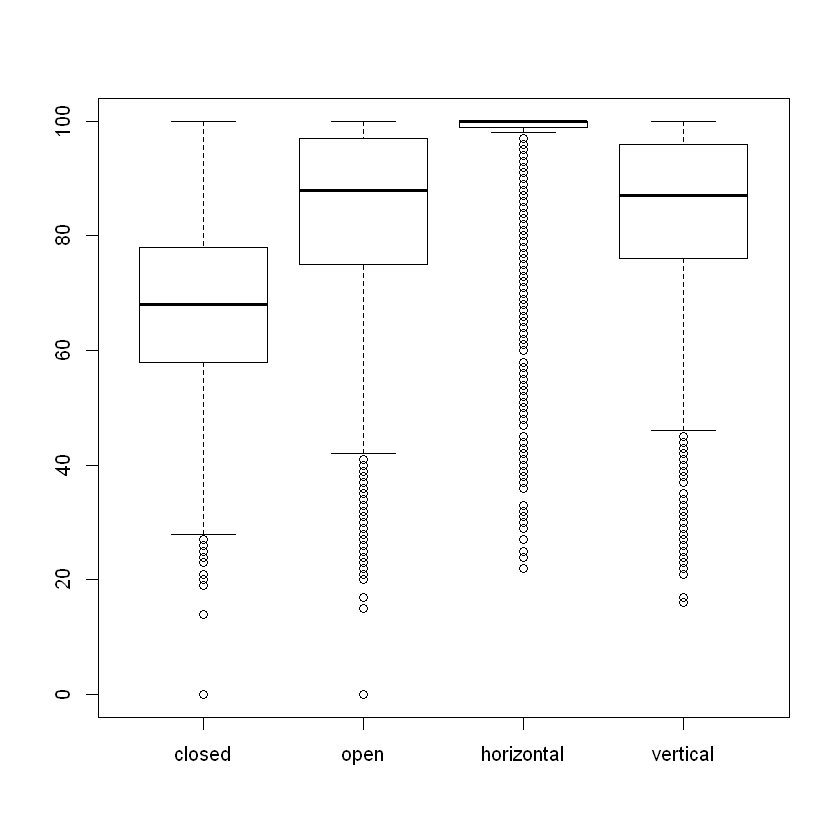

In [28]:
boxplot(count.mine.contacts~grid, data=data.bubble)

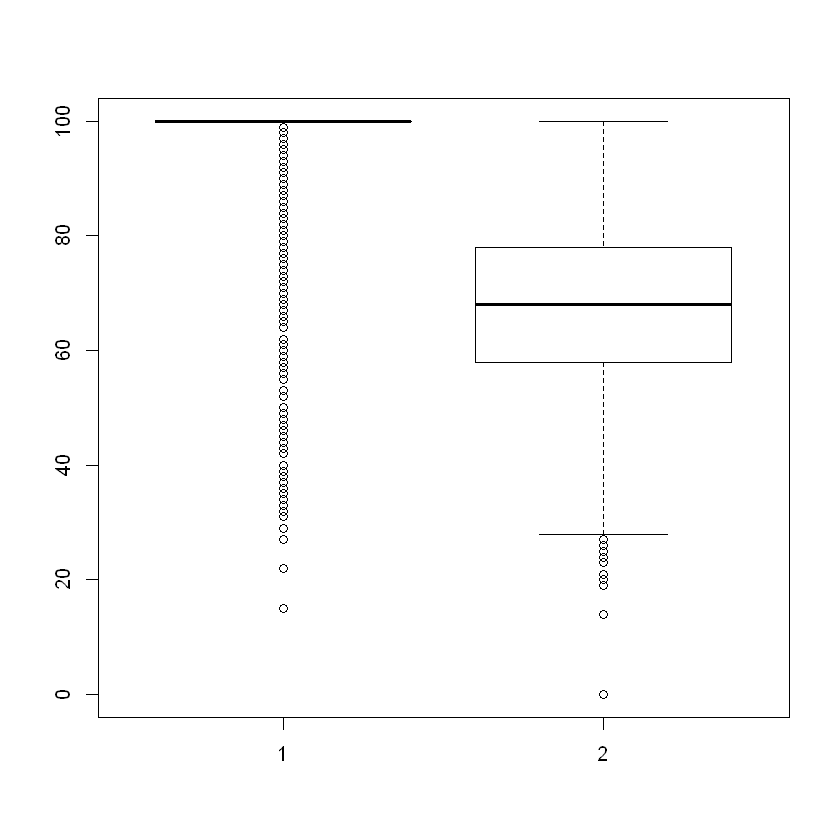

In [29]:
boxplot(data.baseline$count.mine.contacts, data.bubble[data.bubble$grid=='closed',]$count.mine.contacts)